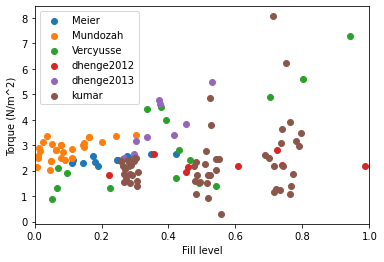

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
torque = np.array(datafile["DetTorque"])
mrtDET = np.array(datafile["DetMRT"])
fill_level = np.array(datafile["Calc Fill level"])
exp = np.array(datafile["Experiments"])
lsratio = np.array(datafile["L/S Ratio"])
feedrate = np.array(datafile["FlowRate (kg/hr)"])
rpm = np.array(datafile["RPM (1/s)"])
omega = rpm * np.pi / 30
fig,ax = plt.subplots()
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(fill_level[i],torque[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('Torque (N/m^2)')
plt.xlim(0,1)
ax.legend()

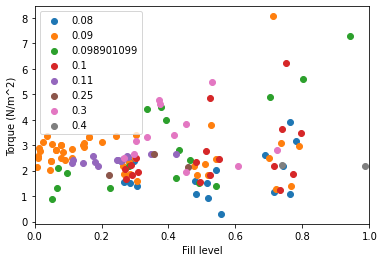

In [63]:
fig,ax = plt.subplots()
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(fill_level[i],torque[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('Torque (N/m^2)')
plt.xlim(0,1)
ax.legend()

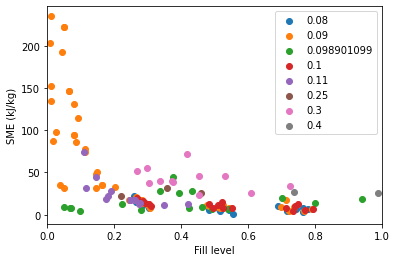

In [64]:
sme = np.divide(np.multiply(torque,omega),feedrate)
fig,ax = plt.subplots()
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(fill_level[i],sme[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('SME (kJ/kg)')
plt.xlim(0,1)
ax.legend()

Text(0, 0.5, 'Fill level')

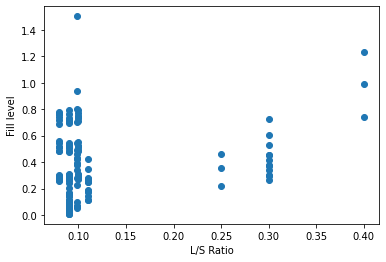

In [65]:
plt.figure()
plt.scatter(lsratio,fill_level)
plt.xlabel('L/S Ratio')
plt.ylabel('Fill level')

Text(0, 0.5, 'SME (kJ/kg)')

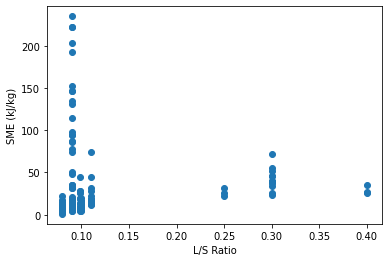

In [66]:
plt.figure()
plt.scatter(lsratio,sme)
plt.xlabel('L/S Ratio')
plt.ylabel('SME (kJ/kg)')

Text(0.5, 0, 'SME (kJ/kg)')

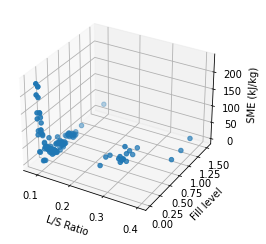

In [67]:
from mpl_toolkits.mplot3d import axes3d
from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'qt')
ax = plt.axes(projection='3d')
ax.scatter3D(lsratio, fill_level,sme)
ax.set_xlabel('L/S Ratio')
ax.set_ylabel('Fill level')
ax.set_zlabel('SME (kJ/kg)')
# plt.show()

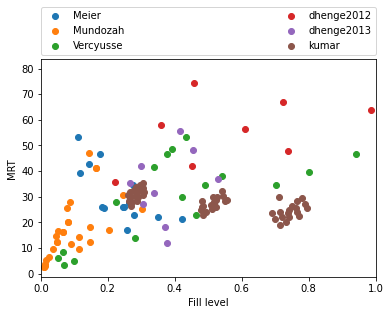

In [68]:
fig,ax = plt.subplots()
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(fill_level[i],mrtDET[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('MRT')
plt.xlim(0,1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

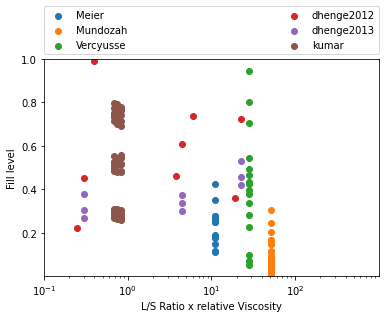

In [69]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

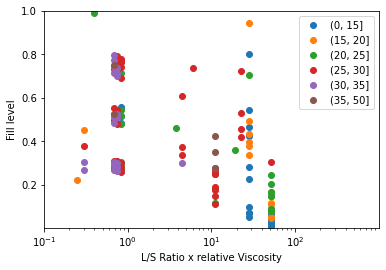

In [70]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
# ax.scatter(np.multiply(lsratio,vis),fill_level,c=extent,s=150,cmap='YlOrRd')
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.legend()
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)

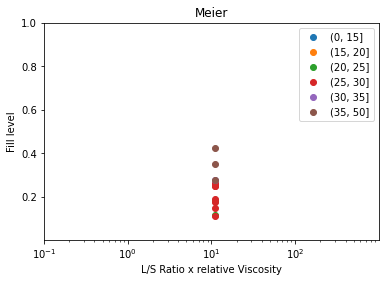

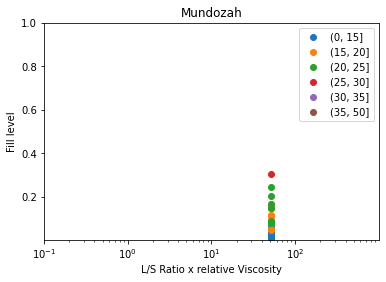

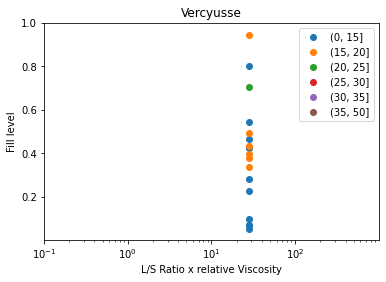

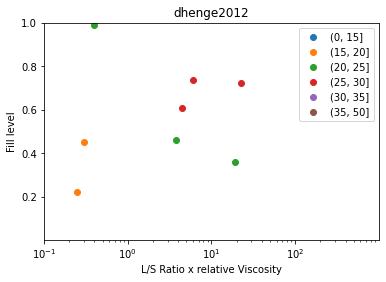

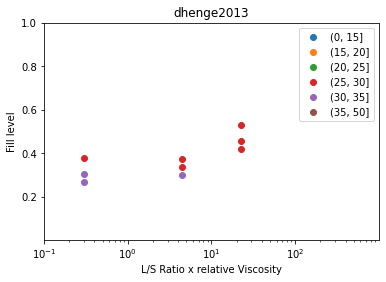

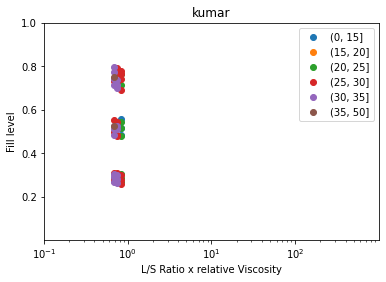

In [71]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(pd.cut(df_region['Extent of gran'],ranges))
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

# ax.scatter(np.multiply(lsratio,vis),fill_level,c=extent,s=150,cmap='YlOrRd')


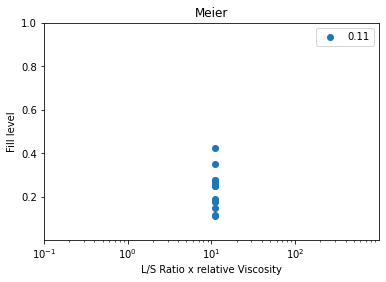

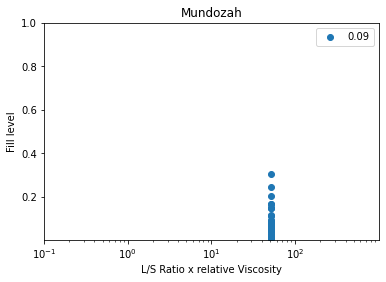

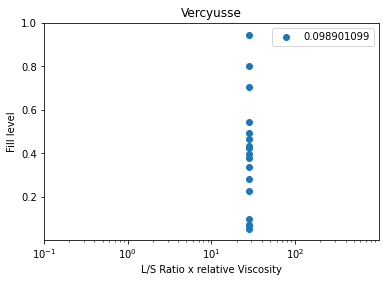

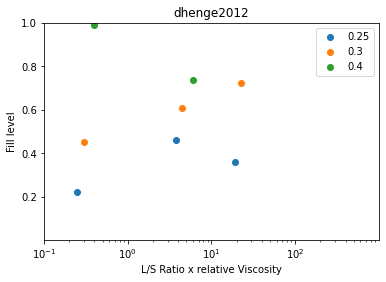

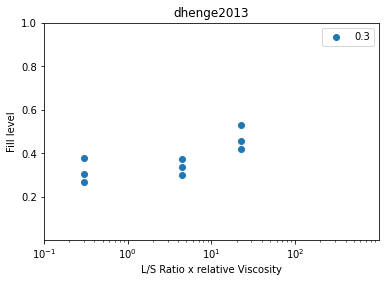

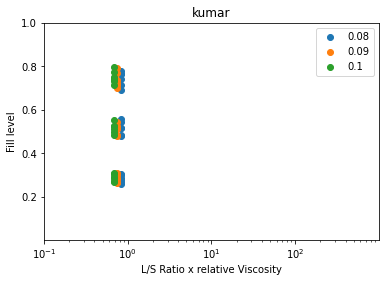

In [72]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(df_region['L/S Ratio'])
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

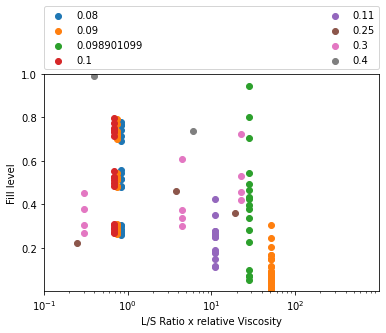

In [73]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

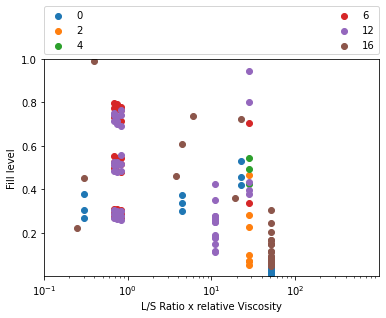

In [74]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
for g in np.unique(nKe):
    i = np.where(nKe==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

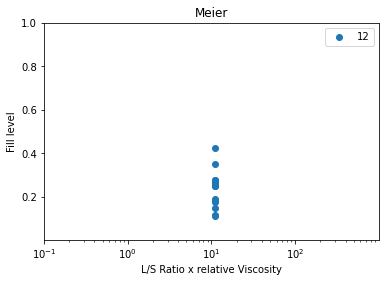

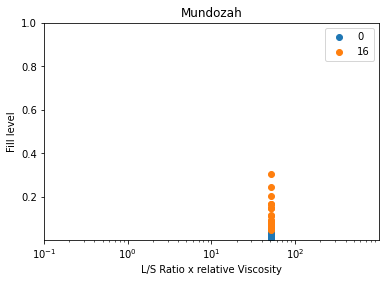

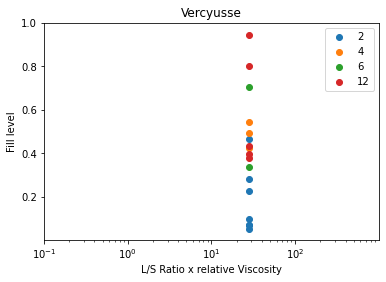

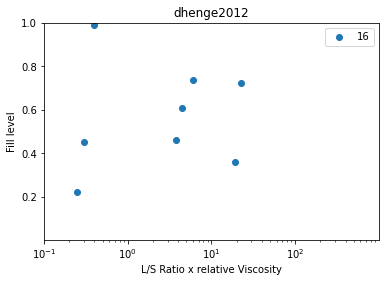

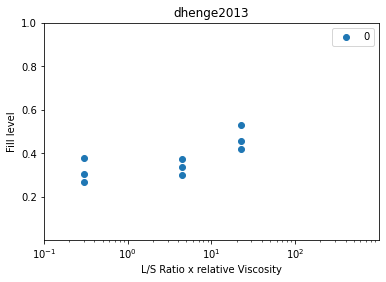

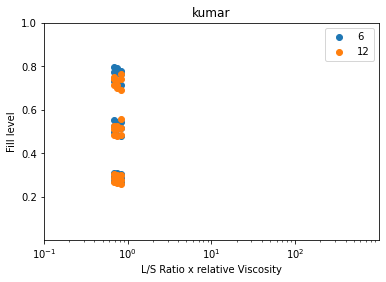

In [75]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(df_region['n KE'])
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

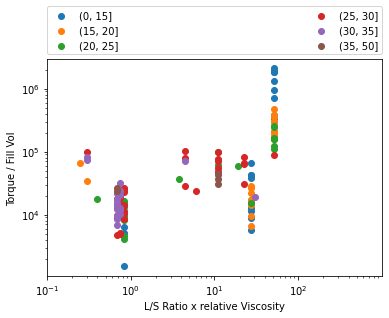

In [76]:

fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
torque = np.array(datafile['DetTorque'])
fillVol = np.array(datafile['Calc Fill volume']) / 1e9
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['DetTorque']/(group['Calc Fill volume']/1e9),label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Torque / Fill Vol')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

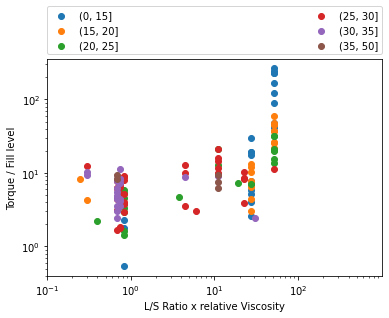

In [77]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
torque = np.array(datafile['DetTorque'])
fillVol = np.array(datafile['Calc Fill volume']) / 1e9
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['DetTorque']/(group['Calc Fill level']),label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Torque / Fill level')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

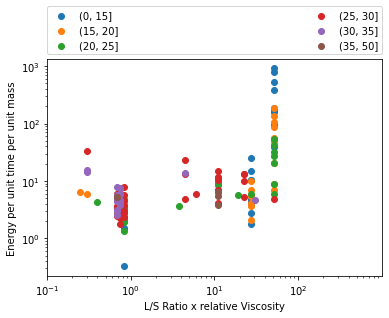

In [78]:
fig,ax = plt.subplots()
vFree = np.array(datafile['Vol free'])
vMax = np.array(datafile['Vol max'])
rpm = np.array(datafile['RPM (1/s)'])
flowRate = np.array(datafile['FlowRate (kg/hr)'])
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    num = group['DetTorque']*group['RPM (1/s)'] / (group['FlowRate (kg/hr)']*group['DetMRT']*(group['Vol free']/group['Vol max']))
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, num,label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [79]:
numer = datafile['DetTorque']*datafile['RPM (1/s)'] / (datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
# print(np.sqrt(2*np.array(numer*(1/(datafile['Vol free']/datafile['Vol max'])))))
print(np.sqrt(2*np.array(numer)))

[ 2.0877277   2.64702675  3.11492976  1.98713747  2.11536218  2.54374116
  2.17946966  1.62081046  1.95544496  2.29448709  2.99167916  3.51138582
  2.25288408  2.39447159  2.80035086  2.19558799  1.89639852  2.14401017
  2.58381054  3.06257315  3.45052199  2.32314947  2.48723575  2.69773498
  2.43375319  2.25836616  2.21066477  2.76308846  3.38546545  3.92004177
  0.80837685  1.72213698  2.18140562  2.46157715  2.32855714  2.96352129
  2.91638037  3.43092534  3.8896541   2.82741208  2.72952644  3.15345748
  3.44244466  2.83379214  3.04459245  2.99005925  3.45848932  3.93201177
  3.24579536  3.11376429  3.39772601  3.22134862  3.16951557  3.00233905
  5.56487766  5.40058023  8.20569088  5.24699246  5.145259    6.81322207
  5.18093509  4.46865456  5.12081325  3.57864005  3.43322914  2.92496178
  2.69908728  3.10970156  3.42320883  3.38848663  3.24033765  3.05835569
  4.09947596  2.74399055  4.8328776   3.55936334  4.71149544  3.27761717
  2.84577039  4.57912917  3.7288562   3.61844064  3

In [80]:
coeffs = [-0.02662002,-0.91135902,0.40100966]
velocity = np.sqrt(2*np.array(numer))
plastic = coeffs[0]*velocity + coeffs[1]*lsratio + coeffs[2]*np.multiply(velocity,lsratio)
ratio = plastic / (1-plastic)
print(ratio)

[-0.05794412 -0.0552258  -0.0529396  -0.05843135 -0.05781018 -0.05572897
 -0.05749931 -0.0602015  -0.05858476 -0.0568632  -0.05095298 -0.04649892
 -0.05721355 -0.05602014 -0.05258226 -0.05769563 -0.06020497 -0.05812917
 -0.05330256 -0.04748254 -0.04271373 -0.05644145 -0.05446795 -0.05192411
 -0.0551121  -0.05721835 -0.05778958 -0.05465974 -0.05161269 -0.04897977
 -0.06410364 -0.05971254 -0.05748992 -0.05612886 -0.05677555 -0.0536806
 -0.05159486 -0.04719122 -0.04323065 -0.05235216 -0.05318396 -0.04957095
 -0.04709217 -0.05229789 -0.0505014  -0.04836864 -0.04261529 -0.03672826
 -0.04523624 -0.046856   -0.04336552 -0.04553657 -0.04617271 -0.0482187
  0.32965648  0.30298965  0.98147335  0.2790106   0.26360742  0.57449209
  0.26896662  0.16990359  0.25996128  0.03698305  0.05067079  0.02750531
 -0.02827666  0.018245    0.10305444  0.02214229  0.03109414  0.04669842
 -0.02775316 -0.04965933 -0.01547421 -0.03660192 -0.01752782 -0.04115419
 -0.04804879 -0.01975752 -0.03384248 -0.0356419  -0.0

In [81]:
velocity = np.sqrt(2*np.array(numer))
import RegressionModels
plastic = RegressionModels.mult_poly_fit(np.array([velocity,lsratio]),True)
ratio = plastic / (1-plastic)
print(ratio)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
fig,ax = plt.subplots()
ratio = plastic / (1-plastic)
datafile['numer'] = numer*ratio
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *(plastic/elastic)')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2,1000])
plt.xticks([1e-2,1e-1,1e0,1e1,1e2,1e3])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [ ]:
# import Clustering_Initial
# fines = datafile['Fines %'] / 100
# X3 = np.array([fines,extent]).T
# X3na = X3[np.logical_not(np.isnan(X3))].reshape(-1,2)
# print(X3na.shape)
# cluster3 = 'fines,extent'
# plotArray = np.array([np.multiply(lsratio,vis),datafile['numer']]).T
# yhat3,model3  = Clustering_Initial.kmeansClustering(5,X3na,X3na)
# clusters = np.unique(yhat3)
# for cluster in clusters:
#     row_i = yhat3[cluster==yhat3]
#     plt.scatter((lsratio[row_i]*vis[row_i]),numer[row_i],label=cluster)
# plt.legend()
# plt.xscale("log")
# plt.yscale("log")
# plt.xlim([1e-1,1000])
# plt.xticks([1e-1,1e0,1e1,1e2])
# plt.title(cluster3)

In [ ]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
numer = np.array(numer).T
for g in np.unique(nKe):
    i = np.where(nKe==g)
    ax.scatter(lsratio[i]*vis[i],numer[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *(plastic/elastic)')
plt.xscale("log")
plt.yscale("log")
plt.xlim([5e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)